<img src="https://www.usnews.com/object/image/0000016d-8dc8-dc08-a77f-8fcf81610000/191002-volatility-stock.jpg?update-time=1570041890247&size=responsive640">

## **Table of Contents**
1.  [ Getting the data](#scrollTo=pcnNsWg0gghR&line=3&uniqifier=1)
2.  [ Adding Technical Data to the Data frame](#scrollTo=TITkGBWHuVur&line=1&uniqifier=1)
3. [Data Cleaning](#scrollTo=_bb4Mwe2g1Et&line=1&uniqifier=1)
4. [Handling missing values](#scrollTo=zAZZoJzXrRN7&line=2&uniqifier=1)
5. [Models & Predictions](#scrollTo=FWbxPmtIL_42&line=1&uniqifier=1)
6. [Model profits according to the Recommendations](#scrollTo=g9kBqKFug4is&line=1&uniqifier=1)

## **Predicting the S&P500 Index** 
#### By Ori Nissim

### **Introduction**
#### In this project I will be using Technical data, Indicators & sentiment from news article in order to predict the direction of the S&P500 Index, Which represents the economy.

### ***TL;DR***
* We got a **24.38%** return on our investment, tested on a 2 year period
* The Model recommended a total of **12** Buy/Sell Actions 
* The Model outpreformed the no-actions return (11.61%) from 2020-12-18 to 2022-12-13 , more than double that return!

**24.38 / 11.61 = ~ 2.1**



### **Getting the Data**
* Yahoo!Finance API in order to get the Financial data 
* New York Times API to get the news in an organized format

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 179.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 185.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 182.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 137.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 195.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3


### How to use the API:
https://github.com/ranaroussi/yfinance

## **Walk through the API - Example of Microsoft stock data**




In [ ]:
import yfinance as yf
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064610,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,226.449997,231.240005,226.410004,227.119995,27369800,0.0,0.0
2023-01-10 00:00:00-05:00,227.759995,231.309998,227.330002,228.850006,27033900,0.0,0.0
2023-01-11 00:00:00-05:00,231.289993,235.949997,231.110001,235.770004,28669300,0.0,0.0


## Let's plot the data on a graph with **matplotlib**

## We'll write a function to plot graphs to reduce code repetition


In [ ]:
def show_graph(data,title,color):
  plt.figure(figsize=(20,10))
  plt.plot(data,color)

  plt.title(title)
  plt.grid()
  plt.show()

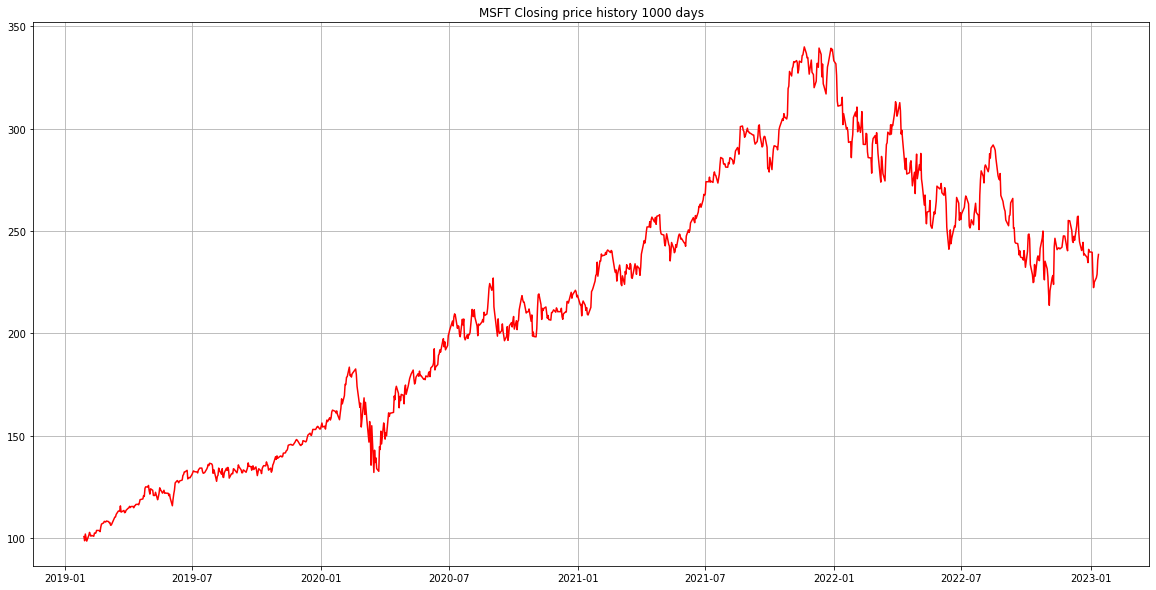

In [ ]:
 close_msft = hist["Close"][-1000:-1]
 
show_graph(close_msft , "MSFT Closing price history 1000 days",'red')

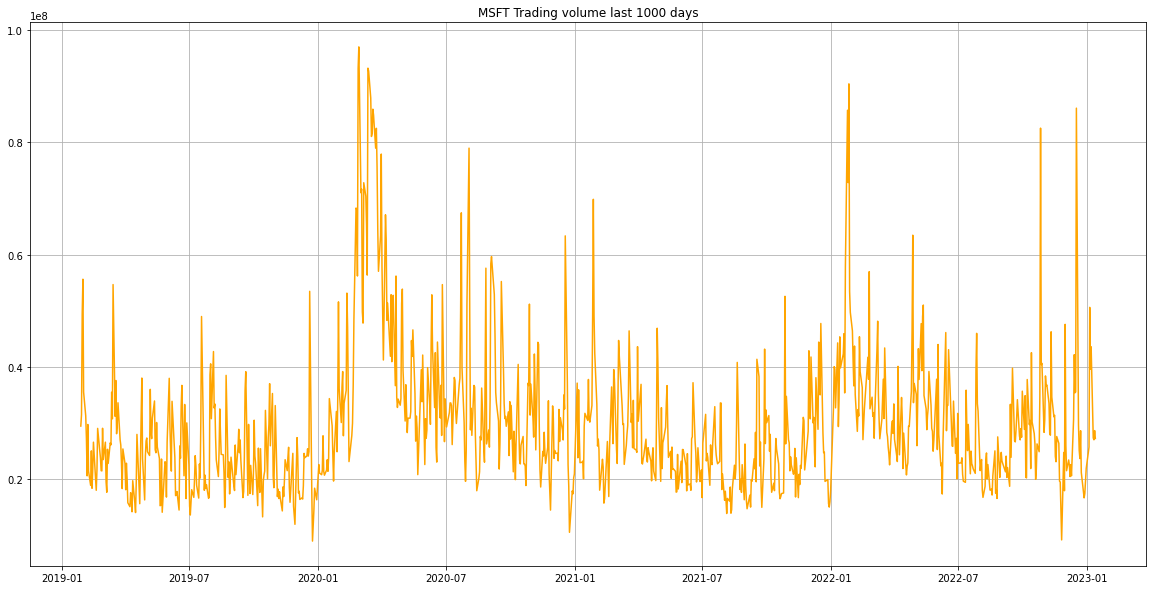

In [ ]:
vol_msft = hist["Volume"][-1000:-1]

show_graph(vol_msft , "MSFT Trading volume last 1000 days",'orange')


### Turns out the api is **not** official from Yahoo!Finance and it is an open-source api, for some reason only certain functions work. The official API is discountinued due to violation of the terms by many users.
### We will gather the rest of the data from ***Alpha Vantage***.

## Consider Profit/risk ratio on model metrics








# **Technical Data**
## After Seeing those examples, let's get the data we need
### Starting with the technical data, we will be working with:
* CCI
* MACDH 
* RSI 
* KDJ 
* WR - The Williams %R index
* ATR - The Average True Range
*CMF The Chaikin Money Flow 
* VIX - Market volatility index


## VIX has a ticker so it will be generated easily, the rest will have to be calculated on the S&P index data.

In [ ]:
vix = yf.Ticker("UVXY")
vix_hist = vix.history(period="max")
vix_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2011-10-04 00:00:00-04:00,2.427000e+09,2.448000e+09,2.058000e+09,2.058000e+09,0,0.0,0.0,0.0
2011-10-05 00:00:00-04:00,1.974600e+09,1.989000e+09,1.813800e+09,1.813800e+09,0,0.0,0.0,0.0
2011-10-06 00:00:00-04:00,1.811400e+09,1.878000e+09,1.740000e+09,1.740000e+09,0,0.0,0.0,0.0
2011-10-07 00:00:00-04:00,1.705800e+09,1.857600e+09,1.684800e+09,1.765200e+09,0,0.0,0.0,0.0
2011-10-10 00:00:00-04:00,1.654800e+09,1.656000e+09,1.559400e+09,1.559400e+09,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,6.290000e+00,6.500000e+00,6.200000e+00,6.400000e+00,25790000,0.0,0.0,0.0
2023-01-10 00:00:00-05:00,6.440000e+00,6.440000e+00,5.970000e+00,6.000000e+00,33812200,0.0,0.0,0.0
2023-01-11 00:00:00-05:00,5.950000e+00,6.080000e+00,5.930000e+00,6.050000e+00,20044900,0.0,0.0,0.0


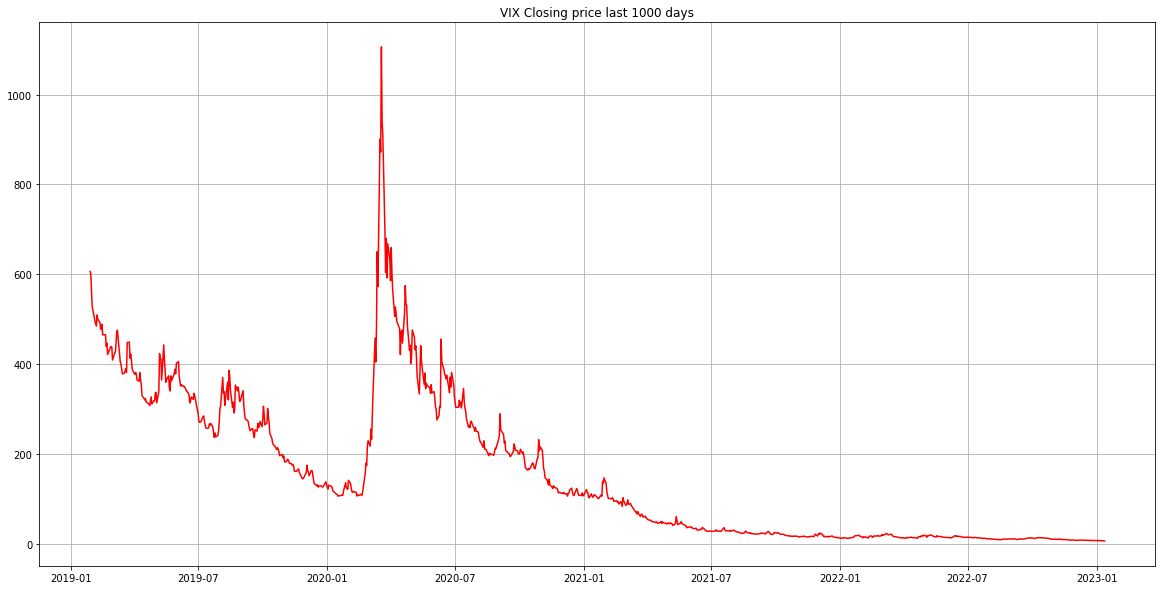

In [ ]:
vix_close = vix_hist["Close"][-1000:-1]
show_graph(vix_close , "VIX Closing price last 1000 days",'red')

## To calculate the indicators we will need the S&P500 data
### The index data is not available to us so we will be using the SPY instead
### SPY is an ETF - Exchange Traded Fund (קרן סל)  that follows the S&P500 index

In [ ]:
snp = yf.Ticker("SPY")
spy_data = snp.history(period="max")
spy_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,25.236152,25.397577,25.236152,25.397577,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,25.379639,25.469320,25.325831,25.451384,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,25.487253,25.738359,25.469317,25.720423,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.810118,25.881863,25.523140,25.828054,531500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,390.369995,393.700012,387.670013,387.859985,73978100,0.0,0.0,0.0
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,0.0,0.0,0.0
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,0.0,0.0,0.0


## Example of fetching same data type but from Alpha vantage


In [ ]:
import requests

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPY&outputsize=full&apikey=Q3O7HGS7ZPJSNRNL&datatype=csv"

spy_data_alpha = pd.read_csv(url)


In [ ]:
spy_data_alpha

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2023-01-13,393.620000,399.100000,393.340000,398.500000,398.500000,63903932,0.0,1.0
1,2023-01-12,396.670000,398.485000,392.420000,396.960000,396.960000,90157699,0.0,1.0
2,2023-01-11,392.230000,395.600000,391.380000,395.520000,395.520000,68881080,0.0,1.0
3,2023-01-10,387.250000,390.650000,386.270000,390.580000,390.580000,65358094,0.0,1.0
4,2023-01-09,390.370000,393.700000,387.670000,387.860000,387.860000,73978071,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5834,1999-11-05,138.625000,139.109299,136.781204,137.875000,90.068563,7431500,0.0,1.0
5835,1999-11-04,136.750000,137.359299,135.765594,136.531204,89.190712,7907500,0.0,1.0
5836,1999-11-03,136.000000,136.375000,135.125000,135.500000,88.517065,7222300,0.0,1.0
5837,1999-11-02,135.968704,137.250000,134.593704,134.593704,87.925016,6516900,0.0,1.0


### We can see ***yfinance*** contains more rows - meaning it **cotains data over a longer period of time**, hence we will use it for calulating the indicator

In [ ]:
# Add VIX to the dataframe
spy_data['vix'] = vix_hist['Close']
spy_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,vix
Date,,,,,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,0.0,0.0,0.0,NaN
1993-02-01 00:00:00-05:00,25.236152,25.397577,25.236152,25.397577,480500,0.0,0.0,0.0,NaN
1993-02-02 00:00:00-05:00,25.379639,25.469320,25.325831,25.451384,201300,0.0,0.0,0.0,NaN
1993-02-03 00:00:00-05:00,25.487253,25.738359,25.469317,25.720423,529400,0.0,0.0,0.0,NaN
1993-02-04 00:00:00-05:00,25.810118,25.881863,25.523140,25.828054,531500,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,390.369995,393.700012,387.670013,387.859985,73978100,0.0,0.0,0.0,6.40
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,0.0,0.0,0.0,6.00
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,0.0,0.0,0.0,6.05


### **VIX index contains many missing values as it starts in 2011, we will fill these values later**

## CCI The Commodity Channel Index can help to identify price reversals, price extremes and trend strength. 20 days

<img src="https://investexcel.net/wp-content/uploads/2016/09/CCI.png"> <img src="https://cdn-amiji.nitrocdn.com/IEZIUgrNRbYQggDlmHBLkLYuABZyJyOL/assets/static/optimized/rev-b9df735/wp-content/uploads/technical-analysis/CCIES.gif">

In [ ]:
# Commodity Channel Index 
def CCI(df, ndays): 
  df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3 
  df['sma'] = df['TP'].rolling(ndays).mean()
  df['mad'] = df['TP'].rolling(ndays).apply(lambda x: pd.Series(x).mad())
  df['CCI'] = (df['TP'] - df['sma']) / (0.015 * df['mad']) 
  return df


In [ ]:
new_spy = CCI(spy_data,20)

In [ ]:
new_spy.head(50)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,vix,TP,sma,mad,CCI
Date,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,0.000,0.0,0.0,NaN,25.188322,NaN,NaN,NaN
1993-02-01 00:00:00-05:00,25.236152,25.397577,25.236152,25.397577,480500,0.000,0.0,0.0,NaN,25.343769,NaN,NaN,NaN
1993-02-02 00:00:00-05:00,25.379639,25.469320,25.325831,25.451384,201300,0.000,0.0,0.0,NaN,25.415511,NaN,NaN,NaN
1993-02-03 00:00:00-05:00,25.487253,25.738359,25.469317,25.720423,529400,0.000,0.0,0.0,NaN,25.642699,NaN,NaN,NaN
1993-02-04 00:00:00-05:00,25.810118,25.881863,25.523140,25.828054,531500,0.000,0.0,0.0,NaN,25.744352,NaN,NaN,NaN
1993-02-05 00:00:00-05:00,25.810133,25.863941,25.666644,25.810133,492100,0.000,0.0,0.0,NaN,25.780239,NaN,NaN,NaN
1993-02-08 00:00:00-05:00,25.810133,25.899814,25.774261,25.810133,596100,0.000,0.0,0.0,NaN,25.828069,NaN,NaN,NaN
1993-02-09 00:00:00-05:00,25.720424,25.720424,25.576935,25.630743,122100,0.000,0.0,0.0,NaN,25.642700,NaN,NaN,NaN
1993-02-10 00:00:00-05:00,25.630761,25.684570,25.559017,25.666634,379600,0.000,0.0,0.0,NaN,25.636740,NaN,NaN,NaN


In [ ]:
new_spy.drop(["mad","sma","TP","Capital Gains","Stock Splits","Dividends"], axis = 1, inplace = True)

In [ ]:
new_spy

,Open,High,Low,Close,Volume,vix,CCI
Date,,,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,NaN,NaN
1993-02-01 00:00:00-05:00,25.236152,25.397577,25.236152,25.397577,480500,NaN,NaN
1993-02-02 00:00:00-05:00,25.379639,25.469320,25.325831,25.451384,201300,NaN,NaN
1993-02-03 00:00:00-05:00,25.487253,25.738359,25.469317,25.720423,529400,NaN,NaN
1993-02-04 00:00:00-05:00,25.810118,25.881863,25.523140,25.828054,531500,NaN,NaN
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,390.369995,393.700012,387.670013,387.859985,73978100,6.40,50.582898
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,6.00,47.966368
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,6.05,115.694396


# **MACD -The Moving Average Convergence Divergence**
### EMA - Exponential Moving Average
### **MACD = 12 days Period EMA − 26 days Period EMA**
<img src="https://dnpgic06wp5lx.cloudfront.net/blog/20200105-142841_macd_example.png">


 First we need to install **Pandas Technical Analysis** so we can use its functions


In [ ]:
pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=a53db796e4ee6f05c5b1c43477bc58fdb54d0df781295ae6e91e45b5d84c2a30
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta


In [ ]:
import pandas_ta as ta

In [ ]:
 # Calculate MACD values using the pandas_ta library
macd =spy_data.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)

In [ ]:
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
1993-01-29 00:00:00-05:00,NaN,NaN,NaN
1993-02-01 00:00:00-05:00,NaN,NaN,NaN
1993-02-02 00:00:00-05:00,NaN,NaN,NaN
1993-02-03 00:00:00-05:00,NaN,NaN,NaN
1993-02-04 00:00:00-05:00,NaN,NaN,NaN
...,...,...,...
2023-01-09 00:00:00-05:00,-1.653901,0.375960,-2.029861
2023-01-10 00:00:00-05:00,-1.040876,0.791189,-1.832064
2023-01-11 00:00:00-05:00,-0.154649,1.341932,-1.496581


In [ ]:
def plot_macd(prices, macd, signal, hist):
    plt.figure(figsize=(20,10))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')



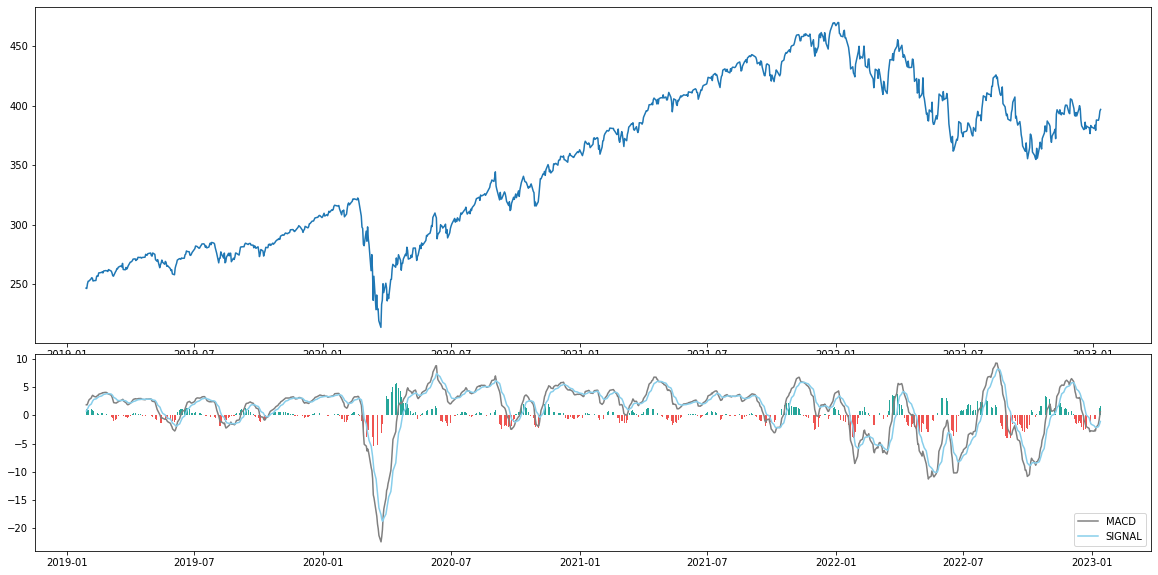

In [ ]:
plot_macd(spy_data['Close'][-1000:-1], macd['MACD_12_26_9'][-1000:-1], macd['MACDs_12_26_9'][-1000:-1], macd['MACDh_12_26_9'][-1000:-1])

# **Calculating RSI** 
## The Relative Strength Index, which measures the average of recent upward movement versus the upward and downward movements combined, in a percentage form.
## 14 days window period
<img src="https://www.alpharithms.com/wp-content/uploads/1674/rsi-formulae-alpharithms.jpg" width="400">

In [ ]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [ ]:
rsi_spy = rsi(spy_data)
spy_data['RSI'] = rsi_spy

In [ ]:
spy_data.tail(10)

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI
Date,,,,,,,,,,,
2022-12-30 00:00:00-05:00,380.640015,382.579987,378.429993,382.429993,83975100,6.86,-70.441193,-2.735248,-1.173100,-1.562148,45.543792
2023-01-03 00:00:00-05:00,384.369995,386.429993,377.829987,380.820007,74850700,6.79,-59.351429,-2.802518,-0.992296,-1.810222,44.155270
2023-01-04 00:00:00-05:00,383.179993,385.880005,380.000000,383.760010,85934100,6.51,-39.308604,-2.588755,-0.622826,-1.965929,47.314116
2023-01-05 00:00:00-05:00,381.720001,381.839996,378.760010,379.380005,76970500,6.59,-68.800998,-2.741177,-0.620199,-2.120978,43.377505
2023-01-06 00:00:00-05:00,382.609985,389.250000,379.410004,388.079987,104041300,6.33,-3.616250,-2.135343,-0.011491,-2.123851,51.932366
2023-01-09 00:00:00-05:00,390.369995,393.700012,387.670013,387.859985,73978100,6.40,50.582898,-1.653901,0.375960,-2.029861,51.719566
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,6.00,47.966368,-1.040876,0.791189,-1.832064,54.217388
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,6.05,115.694396,-0.154649,1.341932,-1.496581,58.424380
2023-01-12 00:00:00-05:00,396.670013,398.489990,392.420013,396.959991,90157700,5.59,154.573039,0.656323,1.722323,-1.066000,59.590062


# While trying to get all technical indicator I came across a library called **stockstats** that is dedicated for calculation those indicator.
## What we need to do is to convert our data to "StockDataFrame" and then just generate new column by passing the indicator name in the brackets.
### example: df["rsi"] will generate a new column in "df" that contains it's RSI signals
### Let's install the package and check that everything works according to the documentation

In [ ]:
pip install stockstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from stockstats import wrap


In [ ]:
spy_data_copy = spy_data.copy()

In [ ]:
spy_data_copy.rename(columns = {'Date':'date', 'Open':'open','Close':'close', 'Volume':'volume', 'High':'high', 'Low':'low'}, inplace = True)


In [ ]:
stockstats_spy= wrap(spy_data_copy)

In [ ]:
stockstats_spy

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi
Date,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01 00:00:00-05:00,25.236152,25.397577,25.236152,25.397577,480500,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02 00:00:00-05:00,25.379639,25.469320,25.325831,25.451384,201300,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03 00:00:00-05:00,25.487253,25.738359,25.469317,25.720423,529400,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04 00:00:00-05:00,25.810118,25.881863,25.523140,25.828054,531500,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,390.369995,393.700012,387.670013,387.859985,73978100,6.40,50.582898,-1.653901,0.375960,-2.029861,51.719566
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,6.00,47.966368,-1.040876,0.791189,-1.832064,54.217388
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,6.05,115.694396,-0.154649,1.341932,-1.496581,58.424380


# Works as expected, now we can add the new column

# **WR Williams %R index**
###  Another index for buy signals by measuring the current price in relation to the past N periods. 14 days
<img src="https://cdn-amiji.nitrocdn.com/IEZIUgrNRbYQggDlmHBLkLYuABZyJyOL/assets/static/optimized/rev-b9df735/wp-content/uploads/technical-analysis/WilliamsRQQQQ.gif" height="400">

In [ ]:
wr = stockstats_spy['wr']

In [ ]:
stockstats_spy

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,wr
Date,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,NaN,NaN,NaN,NaN,NaN,NaN,-14.285714
1993-02-01 00:00:00-05:00,25.236152,25.397577,25.236152,25.397577,480500,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000
1993-02-02 00:00:00-05:00,25.379639,25.469320,25.325831,25.451384,201300,NaN,NaN,NaN,NaN,NaN,NaN,-5.000030
1993-02-03 00:00:00-05:00,25.487253,25.738359,25.469317,25.720423,529400,NaN,NaN,NaN,NaN,NaN,NaN,-2.857166
1993-02-04 00:00:00-05:00,25.810118,25.881863,25.523140,25.828054,531500,NaN,NaN,NaN,NaN,NaN,NaN,-6.976659
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,390.369995,393.700012,387.670013,387.859985,73978100,6.40,50.582898,-1.653901,0.375960,-2.029861,51.719566,-30.850606
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,6.00,47.966368,-1.040876,0.791189,-1.832064,54.217388,-16.481890
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,6.05,115.694396,-0.154649,1.341932,-1.496581,58.424380,-0.384143


#  **KDJ**
###The Stochastic Oscillator measures where the close is relative to the low and high. 14, 3, and 3 days window periods
<img src="https://forexbee.co/wp-content/uploads/2022/02/KDJ-indicator-1-1024x652.png" height = "400">



In [ ]:
stockstats_spy['kdjk']
stockstats_spy['kdjd']
stockstats_spy['kdjk']

Date
1993-01-29 00:00:00-05:00    61.904762
1993-02-01 00:00:00-05:00    74.603175
1993-02-02 00:00:00-05:00    81.402106
1993-02-03 00:00:00-05:00    86.649016
1993-02-04 00:00:00-05:00    88.773791
                               ...    
2023-01-09 00:00:00-05:00    63.982169
2023-01-10 00:00:00-05:00    69.969545
2023-01-11 00:00:00-05:00    79.829599
2023-01-12 00:00:00-05:00    84.084530
2023-01-13 00:00:00-05:00    88.449387
Name: kdjk, Length: 7545, dtype: float64

In [ ]:
stockstats_spy

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,wr,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj
Date,,,,,,,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,NaN,NaN,NaN,NaN,NaN,NaN,-14.285714,85.714286,61.904762,61.904762,53.968254,53.968254,77.777778,77.777778
1993-02-01 00:00:00-05:00,25.236152,25.397577,25.236152,25.397577,480500,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000,100.000000,74.603175,74.603175,60.846561,60.846561,102.116402,102.116402
1993-02-02 00:00:00-05:00,25.379639,25.469320,25.325831,25.451384,201300,NaN,NaN,NaN,NaN,NaN,NaN,-5.000030,94.999970,81.402106,81.402106,67.698409,67.698409,108.809500,108.809500
1993-02-03 00:00:00-05:00,25.487253,25.738359,25.469317,25.720423,529400,NaN,NaN,NaN,NaN,NaN,NaN,-2.857166,97.142834,86.649016,86.649016,74.015278,74.015278,111.916491,111.916491
1993-02-04 00:00:00-05:00,25.810118,25.881863,25.523140,25.828054,531500,NaN,NaN,NaN,NaN,NaN,NaN,-6.976659,93.023341,88.773791,88.773791,78.934782,78.934782,108.451807,108.451807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,390.369995,393.700012,387.670013,387.859985,73978100,6.40,50.582898,-1.653901,0.375960,-2.029861,51.719566,-30.850606,66.203546,63.982169,63.982169,54.802834,54.802834,82.340841,82.340841
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,6.00,47.966368,-1.040876,0.791189,-1.832064,54.217388,-16.481890,81.944295,69.969545,69.969545,59.858404,59.858404,90.191826,90.191826
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,6.05,115.694396,-0.154649,1.341932,-1.496581,58.424380,-0.384143,99.549707,79.829599,79.829599,66.515469,66.515469,106.457859,106.457859


# **ATR - The Average True Range** 
### provides an indicator for the volatility of price. We converted ATR into percentages. 14 days window period
<img src="https://eadn-wc03-4272332.nxedge.io/wp-content/uploads/2017/07/ATR-Indicator-Strategy-4.png">

In [ ]:
stockstats_spy['atr']
stockstats_spy

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,wr,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,atr
Date,,,,,,,,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,NaN,NaN,NaN,NaN,NaN,NaN,-14.285714,85.714286,61.904762,61.904762,53.968254,53.968254,77.777778,77.777778,0.125553
1993-02-01 00:00:00-05:00,25.236152,25.397577,25.236152,25.397577,480500,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000,100.000000,74.603175,74.603175,60.846561,60.846561,102.116402,102.116402,0.153454
1993-02-02 00:00:00-05:00,25.379639,25.469320,25.325831,25.451384,201300,NaN,NaN,NaN,NaN,NaN,NaN,-5.000030,94.999970,81.402106,81.402106,67.698409,67.698409,108.809500,108.809500,0.149883
1993-02-03 00:00:00-05:00,25.487253,25.738359,25.469317,25.720423,529400,NaN,NaN,NaN,NaN,NaN,NaN,-2.857166,97.142834,86.649016,86.649016,74.015278,74.015278,111.916491,111.916491,0.188055
1993-02-04 00:00:00-05:00,25.810118,25.881863,25.523140,25.828054,531500,NaN,NaN,NaN,NaN,NaN,NaN,-6.976659,93.023341,88.773791,88.773791,78.934782,78.934782,108.451807,108.451807,0.227425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,390.369995,393.700012,387.670013,387.859985,73978100,6.40,50.582898,-1.653901,0.375960,-2.029861,51.719566,-30.850606,66.203546,63.982169,63.982169,54.802834,54.802834,82.340841,82.340841,6.845791
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,6.00,47.966368,-1.040876,0.791189,-1.832064,54.217388,-16.481890,81.944295,69.969545,69.969545,59.858404,59.858404,90.191826,90.191826,6.669663
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,6.05,115.694396,-0.154649,1.341932,-1.496581,58.424380,-0.384143,99.549707,79.829599,79.829599,66.515469,66.515469,106.457859,106.457859,6.551831


# **CMF**
### The Chaikin Money Flow provides an indicator related to the trading volume. 20 days window period


In [ ]:
def calculate_money_flow_volume_series(df: pd.DataFrame) -> pd.Series:
    """
    Calculates money flow series
    """
    mfv = df['volume'] * (2*df['close'] - df['high'] - df['low']) / \
                                    (df['high'] - df['low'])
    return mfv

In [ ]:
cmf = calculate_money_flow_volume_series(stockstats_spy)
cmf

Date
1993-01-29 00:00:00-05:00    7.165714e+05
1993-02-01 00:00:00-05:00    4.805000e+05
1993-02-02 00:00:00-05:00    1.509750e+05
1993-02-03 00:00:00-05:00    4.588133e+05
1993-02-04 00:00:00-05:00    3.720500e+05
                                 ...     
2023-01-09 00:00:00-05:00   -6.931682e+07
2023-01-10 00:00:00-05:00    6.326881e+07
2023-01-11 00:00:00-05:00    6.626894e+07
2023-01-12 00:00:00-05:00    4.470739e+07
2023-01-13 00:00:00-05:00    5.055841e+07
Length: 7545, dtype: float64

In [ ]:
stockstats_spy['cmf'] = cmf
stockstats_spy.tail(5)

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,...,wr,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,atr,cmf
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-09 00:00:00-05:00,390.369995,393.700012,387.670013,387.859985,73978100,6.40,50.582898,-1.653901,0.375960,-2.029861,...,-30.850606,66.203546,63.982169,63.982169,54.802834,54.802834,82.340841,82.340841,6.845791,-6.931682e+07
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,6.00,47.966368,-1.040876,0.791189,-1.832064,...,-16.481890,81.944295,69.969545,69.969545,59.858404,59.858404,90.191826,90.191826,6.669663,6.326881e+07
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,6.05,115.694396,-0.154649,1.341932,-1.496581,...,-0.384143,99.549707,79.829599,79.829599,66.515469,66.515469,106.457859,106.457859,6.551831,6.626894e+07
2023-01-12 00:00:00-05:00,396.670013,398.489990,392.420013,396.959991,90157700,5.59,154.573039,0.656323,1.722323,-1.066000,...,-6.450247,92.594393,84.084530,84.084530,72.371823,72.371823,107.509945,107.509945,6.517413,4.470739e+07
2023-01-13 00:00:00-05:00,393.619995,399.100006,393.339996,398.500000,63863400,5.39,173.895303,1.407070,1.978456,-0.571386,...,-2.645530,97.179099,88.449387,88.449387,77.731011,77.731011,109.886138,109.886138,6.463313,5.055841e+07


## **Correlation Heatmap**

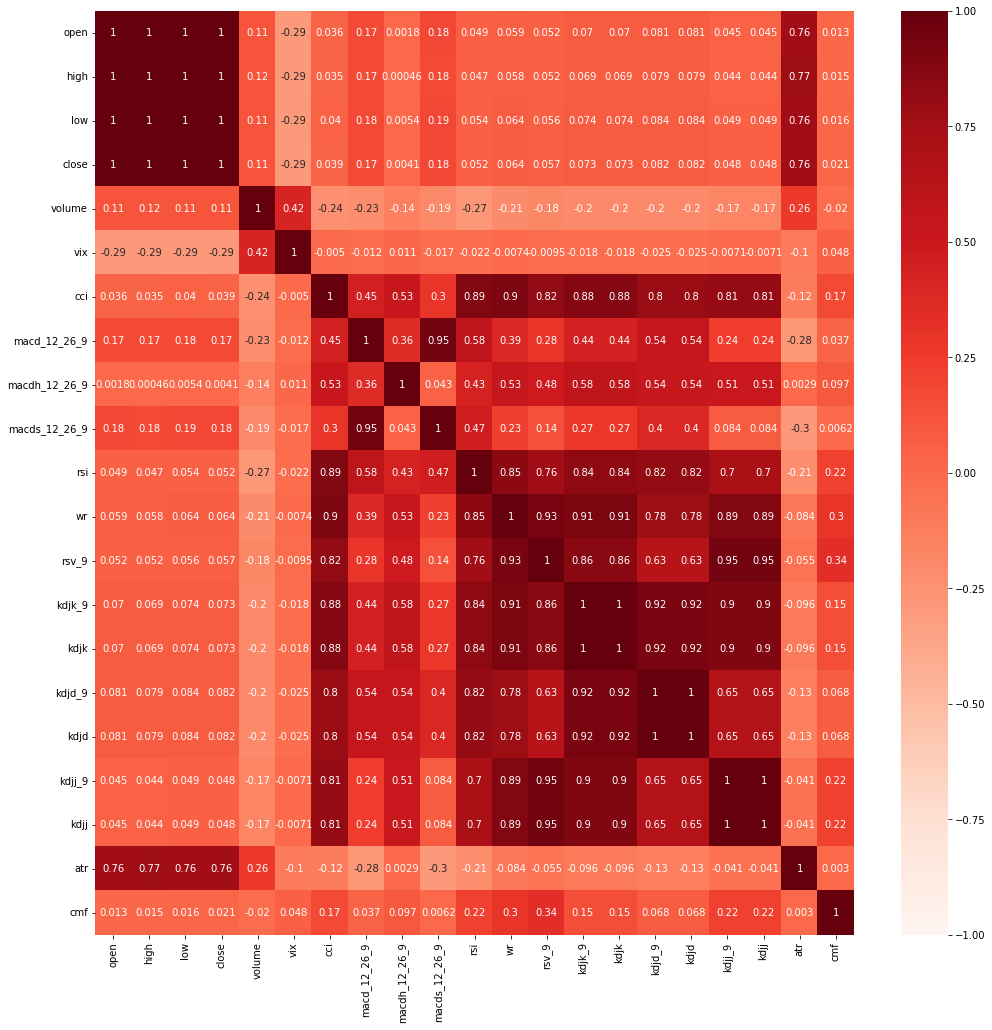

In [ ]:
# show absolute correlation between features in a heatmap
import seaborn as sns

plt.figure(figsize=(17,17))
cor = stockstats_spy.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=-1, vmax=1)
plt.show()

# **Generating target columns**
#### Our goal is to predict tomorrows, next week and next month direction.
#### To do so we will add new columns - next day, week & month closing prices.
#### We'll now add those coulmn and also add a boolean column to each one so we can say if the price went up or down during that period. 
#### A total of **6** columns.

In [ ]:
stockstats_spy["tomorrow"] = stockstats_spy["close"].shift(-1)  # Shifts Close values one day back and makes a new column from those values
stockstats_spy["next_week"] = stockstats_spy["close"].shift(-5) # Next week values are 5 days apart because there are 5 trading days a week
stockstats_spy["next_month"] = stockstats_spy["close"].shift(-20) # Same logic as above

## **Now, based on those column, we can calculate direction -> 3 more boolean (0 or 1 ) columns**

In [ ]:
stockstats_spy["target_tomrrow"] = (stockstats_spy["tomorrow"] > stockstats_spy["close"]).astype(int)
stockstats_spy["target_next_week"] = (stockstats_spy["next_week"] > stockstats_spy["close"]).astype(int)
stockstats_spy["target_next_month"] = (stockstats_spy["next_month"] > stockstats_spy["close"]).astype(int)

# **Data Cleaning**
## Handling Missing Values



Text(0.5, 1.0, 'Missing values heatmap')

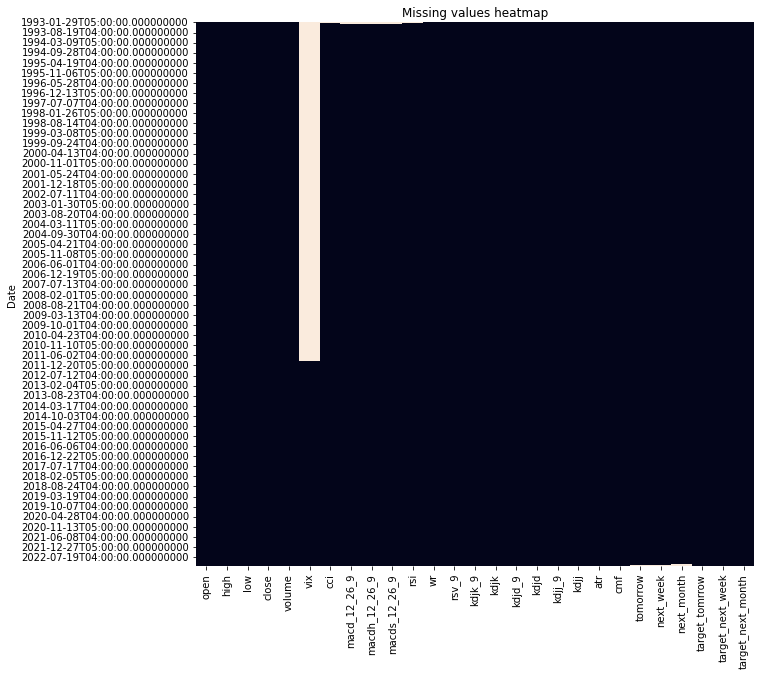

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(stockstats_spy.isna(), cbar = False).set_title("Missing values heatmap")


## **Conclusion**
### As expected, VIX has many missing values and we will need to fill those in the best way possible so we wont damage the information gain
### It is hard to see in the diagram but some of the indicators have missing values due to usage of moving average
### There also missing values in the end of the dataframe

In [ ]:
spy_no_vix = stockstats_spy.drop_column('vix')

In [ ]:
spy_no_vix.tail(21)

,open,high,low,close,volume,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,...,kdjj_9,kdjj,atr,cmf,tomorrow,next_week,next_month,target_tomrrow,target_next_week,target_next_month
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-14 00:00:00-05:00,399.774230,403.646464,394.498469,397.574341,108111300,33.783111,3.070208,-0.857725,3.927934,54.302917,...,42.044165,42.044165,6.915739,-3.540979e+07,387.848999,386.230011,398.5,0,0,1
2022-12-15 00:00:00-05:00,392.497635,393.443305,386.116962,387.848999,117705900,-127.467669,2.154112,-1.419057,3.573169,45.623201,...,16.735787,16.735787,7.240141,-6.205168e+07,383.269989,380.720001,NaN,0,0,0
2022-12-16 00:00:00-05:00,385.179993,386.579987,381.040009,383.269989,119858000,-198.508882,1.046547,-2.021297,3.067845,42.202815,...,4.785541,4.785541,7.209345,-2.336628e+07,380.019989,382.910004,NaN,0,0,0
2022-12-19 00:00:00-05:00,383.470001,383.820007,378.279999,380.019989,79878100,-205.551591,-0.092388,-2.528187,2.435798,39.915492,...,-1.987515,-1.987515,7.090107,-2.970232e+07,380.540009,381.399994,NaN,1,1,0
2022-12-20 00:00:00-05:00,379.230011,382.230011,377.850006,380.540009,74427200,-179.039719,-0.942181,-2.702383,1.760202,40.471438,...,-1.800077,-1.800077,6.896528,1.699249e+07,386.230011,376.660004,NaN,1,0,0
2022-12-21 00:00:00-05:00,383.250000,387.410004,382.690002,386.230011,78167400,-100.992073,-1.143333,-2.322828,1.179495,46.323774,...,13.840480,13.840480,6.894633,3.908395e+07,380.720001,383.440002,NaN,0,0,0
2022-12-22 00:00:00-05:00,383.049988,386.209991,374.769989,380.720001,100120900,-136.760753,-1.727446,-2.325553,0.598107,42.016088,...,14.768047,14.768047,7.220732,4.026032e+06,382.910004,382.429993,NaN,1,1,0
2022-12-23 00:00:00-05:00,379.649994,383.059998,378.029999,382.910004,59857300,-111.284345,-1.990697,-2.071043,0.080346,44.235681,...,20.525789,20.525789,7.064251,5.628743e+07,381.399994,380.820007,NaN,0,0,0
2022-12-27 00:00:00-05:00,382.790009,383.149994,379.649994,381.399994,51638200,-96.543838,-2.294718,-1.900052,-0.394667,43.013076,...,22.627283,22.627283,6.809662,0.000000e+00,376.660004,383.760010,NaN,0,1,0


In [ ]:
spy_no_vix.head(40)

,open,high,low,close,volume,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,...,kdjj_9,kdjj,atr,cmf,tomorrow,next_week,next_month,target_tomrrow,target_next_week,target_next_month
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,NaN,NaN,NaN,NaN,NaN,...,77.777778,77.777778,0.125553,7.165714e+05,25.397577,25.810133,25.415516,1,1,1
1993-02-01 00:00:00-05:00,25.236152,25.397577,25.236152,25.397577,480500,NaN,NaN,NaN,NaN,NaN,...,102.116402,102.116402,0.153454,4.805000e+05,25.451384,25.810133,25.792191,1,1,1
1993-02-02 00:00:00-05:00,25.379639,25.469320,25.325831,25.451384,201300,NaN,NaN,NaN,NaN,NaN,...,108.809500,108.809500,0.149883,1.509750e+05,25.720423,25.630743,25.899788,1,1,1
1993-02-03 00:00:00-05:00,25.487253,25.738359,25.469317,25.720423,529400,NaN,NaN,NaN,NaN,NaN,...,111.916491,111.916491,0.188055,4.588133e+05,25.828054,25.666634,25.756306,1,0,1
1993-02-04 00:00:00-05:00,25.810118,25.881863,25.523140,25.828054,531500,NaN,NaN,NaN,NaN,NaN,...,108.451807,108.451807,0.227425,3.720500e+05,25.810133,25.792191,25.684584,0,0,0
1993-02-05 00:00:00-05:00,25.810133,25.863941,25.666644,25.810133,492100,NaN,NaN,NaN,NaN,NaN,...,103.390393,103.390393,0.221430,2.236818e+05,25.810133,25.594883,26.258532,0,0,1
1993-02-08 00:00:00-05:00,25.810133,25.899814,25.774261,25.810133,596100,NaN,NaN,NaN,NaN,NaN,...,98.126251,98.126251,0.204510,-2.554714e+05,25.630743,24.949188,26.168842,0,0,1
1993-02-09 00:00:00-05:00,25.720424,25.720424,25.576935,25.630743,122100,NaN,NaN,NaN,NaN,NaN,...,77.053206,77.053206,0.209091,-3.052500e+04,25.666634,24.931246,26.222647,1,0,1
1993-02-10 00:00:00-05:00,25.630761,25.684570,25.559017,25.666634,379600,NaN,NaN,NaN,NaN,NaN,...,69.985934,69.985934,0.196832,2.711429e+05,25.792191,24.913313,26.150911,1,0,1


## According to the data above we need to remove 33 rows from the beggining & 20 rows from the end

In [ ]:
spy_clean = spy_no_vix.drop_head(33)
spy_clean = spy_clean.drop_tail(20)

In [ ]:
spy_clean.isna().sum()

open                 0
high                 0
low                  0
close                0
volume               0
cci                  0
macd_12_26_9         0
macdh_12_26_9        0
macds_12_26_9        0
rsi                  0
wr                   0
rsv_9                0
kdjk_9               0
kdjk                 0
kdjd_9               0
kdjd                 0
kdjj_9               0
kdjj                 0
atr                  0
cmf                  0
tomorrow             0
next_week            0
next_month           0
target_tomrrow       0
target_next_week     0
target_next_month    0
dtype: int64

# **Let us start with a base model - Random Forest Classifier**
### This is a classification mission and not a regression, we want direction, not a certain price.
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## **Test Train split**
We have data from 1993 untill today, about 30 years of data

Unlike regular data frame, Time series data cannot be splitted randomly across the dataframe while sampling random rows, as this can be resulted in the model 'cheating' and knowing what will happen in the future.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_day = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = spy_clean.iloc[:-400] # all days up to the last 400 days
test = spy_clean.iloc[-400:] # last 400 days
# Relevant columns for the model to look at
predictors = ['close','volume', 'cci', 'macd_12_26_9', 'macdh_12_26_9',
       'macds_12_26_9', 'rsi', 'wr', 'rsv_9', 'kdjk_9', 'kdjk', 'kdjd_9',
       'kdjd', 'kdjj_9', 'kdjj', 'atr', 'cmf', ] 
model_day.fit(train[predictors], train["target_tomrrow"])

RandomForestClassifier(min_samples_split=100, random_state=1)

## **Metrics**
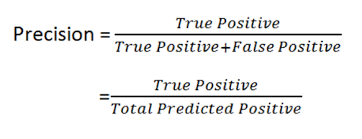

First lets have a look on precision score, afterwards we are going to measure actual profit. 

**POSITIVE = MARKET GOING UP**


In [ ]:
from sklearn.metrics import precision_score

preds = model_day.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target_tomrrow"], preds)

0.4886731391585761

## Second model with different Hyperparamters

In [ ]:
model_day_2 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target_tomrrow"])
    preds = model.predict_proba(test[predictors])[:,1]   # return model's probability
    preds[preds >=.6] = 1  # only decied '1' if the model is more than 60% "sure" the market will go up
    preds[preds <.6] = 0   # else, it will go down
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target_tomrrow"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):  # 10 years of data for training, the following year is the test data
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(spy_clean,model_day_2,predictors)

In [ ]:
precision_score(predictions["target_tomrrow"], predictions["Predictions"])

0.5581761006289309

# **We got a better score!**
## **Lets add past data to each row and see how it affects the score**
* 2,5,20,125,250,500 days close ratio mean
* 2,5,20,125,250,500 days trend - how many days in those time windows did the market actually went up

In [ ]:
horizons = [ 2,5,20,125,250,500]

for horizon in horizons:
    rolling_averages = spy_clean.rolling(horizon).mean()
    
    ratio_column = f"close_ratio_{horizon}"
    spy_clean[ratio_column] = spy_clean["close"] / rolling_averages["close"]
    
    trend_column = f"trend_{horizon}"
    spy_clean[trend_column] = spy_clean.shift(1).rolling(horizon).sum()["target_tomrrow"]
    


In [ ]:
spy_clean = spy_clean.dropna()

In [ ]:
spy_clean

,open,high,low,close,volume,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,...,close_ratio_5,trend_5,close_ratio_20,trend_20,close_ratio_125,trend_125,close_ratio_250,trend_250,close_ratio_500,trend_500
Date,,,,,,,,,,,,,,,,,,,,,
1993-03-18 00:00:00-05:00,25.953611,26.115036,25.953611,26.007420,59300,64.144806,0.175181,-0.020561,0.195742,57.813558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-19 00:00:00-05:00,26.112217,26.112217,25.968050,25.968050,66900,58.056650,0.166406,-0.023468,0.189875,56.532133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-22 00:00:00-05:00,25.715769,25.877957,25.697748,25.823895,183400,0.478339,0.146135,-0.034991,0.181127,51.988285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-23 00:00:00-05:00,25.895964,25.913985,25.841901,25.877943,55200,12.744008,0.132900,-0.038582,0.171481,53.497470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-24 00:00:00-05:00,25.841901,25.986068,25.715755,25.877943,37200,-2.616236,0.121015,-0.040373,0.161388,53.497470,...,0.998722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-08 00:00:00-05:00,393.333824,395.543648,391.472347,394.428772,60737900,-46.020750,3.799111,-1.291193,5.090304,52.350672,...,0.995713,1.0,0.994616,8.0,1.018700,53.0,0.964291,109.0,0.961853,257.0
2022-12-09 00:00:00-05:00,393.134716,395.802458,391.352889,391.482300,81447700,-69.795041,3.157491,-1.546250,4.703741,49.596121,...,0.995091,1.0,0.987360,7.0,1.010645,53.0,0.957706,109.0,0.954509,256.0
2022-12-12 00:00:00-05:00,392.308501,397.126404,391.611719,397.126404,75405800,-20.323027,3.069057,-1.307748,4.376805,54.531460,...,1.009765,2.0,1.001540,7.0,1.024622,54.0,0.972058,110.0,0.968085,256.0


In [ ]:
spy_clean.columns

Index(['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',
       'macdh_12_26_9', 'macds_12_26_9', 'rsi', 'wr', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'atr', 'cmf', 'tomorrow',
       'next_week', 'next_month', 'target_tomrrow', 'target_next_week',
       'target_next_month', 'close_ratio_2', 'trend_2', 'close_ratio_5',
       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500'],
      dtype='object')

## **Now lets try again**


In [ ]:
predictors = ['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',
       'macdh_12_26_9', 'macds_12_26_9', 'rsi', 'wr', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'atr', 'cmf',
       'close_ratio_2', 'trend_2', 'close_ratio_5',
       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']
predictions = backtest(spy_clean,model_day_2,predictors)
precision_score(predictions["target_tomrrow"], predictions["Predictions"])

0.5301507537688442

# **Weekly upward direction prediction**

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target_next_week"])
    preds = model.predict_proba(test[predictors])[:,1]   # return model's probability
    preds[preds >=.6] = 1  # only decied '1' if the model is more than 60% "sure" the market will go up
    preds[preds <.6] = 0   # else, it will go down
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target_next_week"], preds], axis=1)
    return combined

In [ ]:
predictors = ['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',
       'macdh_12_26_9', 'macds_12_26_9', 'rsi',
       'close_ratio_2', 'trend_2', 'close_ratio_5',
       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']
model_week =  RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
predictions_week = backtest(spy_clean,model_week,predictors)
precision_score(predictions_week["target_next_week"], predictions_week["Predictions"])

0.5763274336283186

# **Monthly upward direction prediction**

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target_next_month"])
    preds = model.predict_proba(test[predictors])[:,1]   # return model's probability
    preds[preds >=.65] = 1  # only decied '1' if the model is more than 60% "sure" the market will go up
    preds[preds <.65] = 0   # else, it will go down
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target_next_month"], preds], axis=1)
    return combined

In [ ]:
predictors = ['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',
       'macdh_12_26_9', 'macds_12_26_9', 'rsi',
       'close_ratio_2', 'trend_2', 'close_ratio_5',
       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']

In [ ]:
model_month =  RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
predictions_month = backtest(spy_clean,model_month,predictors)
precision_score(predictions_month["target_next_month"], predictions_month["Predictions"])

0.665625

# **Monthly Downward direction prediction accuracy**
<img src= "https://geekymedics.com/wp-content/uploads/2018/06/Specificity-equation.jpg" height= 250>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
tn, fp, fn, tp = confusion_matrix(predictions_month["target_next_month"], predictions_month["Predictions"]).ravel()
specificity = tn / (tn+fp)

In [ ]:
specificity

0.7191601049868767

In [ ]:
predictions_month.tail(15)

,target_next_month,Predictions
Date,,
2022-11-22 00:00:00-05:00,0,1.0
2022-11-23 00:00:00-05:00,0,1.0
2022-11-25 00:00:00-05:00,0,0.0
2022-11-28 00:00:00-05:00,0,1.0
2022-11-29 00:00:00-05:00,0,1.0
2022-11-30 00:00:00-05:00,0,1.0
2022-12-01 00:00:00-05:00,0,1.0
2022-12-02 00:00:00-05:00,0,1.0
2022-12-05 00:00:00-05:00,0,0.0


In [ ]:
sum_of_upward_days = predictions_month.shift(1).rolling(20).sum()["Predictions"]
sum_of_upward_days

Date
2005-02-11 00:00:00-05:00     NaN
2005-02-14 00:00:00-05:00     NaN
2005-02-15 00:00:00-05:00     NaN
2005-02-16 00:00:00-05:00     NaN
2005-02-17 00:00:00-05:00     NaN
                             ... 
2022-12-07 00:00:00-05:00    16.0
2022-12-08 00:00:00-05:00    15.0
2022-12-09 00:00:00-05:00    15.0
2022-12-12 00:00:00-05:00    14.0
2022-12-13 00:00:00-05:00    13.0
Name: Predictions, Length: 4491, dtype: float64

In [ ]:
sum_of_upward_days = sum_of_upward_days.to_frame()

In [ ]:
# create a list of our conditions
conditions = [
    (sum_of_upward_days['Predictions'] >= 14),
    (sum_of_upward_days['Predictions'] <= 6),
    ((sum_of_upward_days['Predictions'] > 6) & (sum_of_upward_days['Predictions'] < 14))
    ]

# create a list of the values we want to assign for each condition
values = ['buy', 'sell', 'hold']

# create a new column and use np.select to assign values to it using our lists as arguments
sum_of_upward_days['signal'] = np.select(conditions, values)


In [ ]:
sum_of_upward_days= sum_of_upward_days.dropna()
sum_of_upward_days

,Predictions,signal
Date,,
2005-03-14 00:00:00-05:00,9.0,hold
2005-03-15 00:00:00-05:00,8.0,hold
2005-03-16 00:00:00-05:00,9.0,hold
2005-03-17 00:00:00-05:00,9.0,hold
2005-03-18 00:00:00-05:00,10.0,hold
...,...,...
2022-12-07 00:00:00-05:00,16.0,buy
2022-12-08 00:00:00-05:00,15.0,buy
2022-12-09 00:00:00-05:00,15.0,buy


In [ ]:
actions_and_returns = pd.concat([sum_of_upward_days, spy_clean['close']], axis=1)

In [ ]:
actions_and_returns = actions_and_returns.dropna()
actions_and_returns

,Predictions,signal,close
Date,,,
2005-03-14 00:00:00-05:00,9.0,hold,85.487114
2005-03-15 00:00:00-05:00,8.0,hold,84.781418
2005-03-16 00:00:00-05:00,9.0,hold,84.061638
2005-03-17 00:00:00-05:00,9.0,hold,84.230988
2005-03-18 00:00:00-05:00,10.0,hold,83.980919
...,...,...,...
2022-12-07 00:00:00-05:00,16.0,buy,391.362854
2022-12-08 00:00:00-05:00,15.0,buy,394.428772
2022-12-09 00:00:00-05:00,15.0,buy,391.482300


# **Calculate Return on the test set - last 500 days**
Will be done in the following manner:
Run in a for loop across all prediction and wait for a **BUY** signal

When we see one we save current price and our position

When we see the first **SELL** signal we calculate return based on the close price of that specific day and save it

After iterating on the whole set we compare the return to the return we would have got without selling at all during this period

## **Last 500 Days return**


In [ ]:
spy_500_days = spy_clean['close'][-500:].to_frame()
spy_500_days

,close
Date,
2020-12-18 00:00:00-05:00,358.507446
2020-12-21 00:00:00-05:00,357.225647
2020-12-22 00:00:00-05:00,356.623505
2020-12-23 00:00:00-05:00,356.944000
2020-12-24 00:00:00-05:00,358.332611
...,...
2022-12-07 00:00:00-05:00,391.362854
2022-12-08 00:00:00-05:00,394.428772
2022-12-09 00:00:00-05:00,391.482300


In [ ]:
entered = spy_500_days['close'].iloc[-500]
entered

358.5074462890625

In [ ]:
sold = spy_500_days['close'].iloc[-1]
sold

400.1325988769531

In [ ]:
no_sell_return = (sold / entered )*100

In [ ]:
no_sell_return

111.61068006222902

# **We are left with 111.61% of our initial amount, meaning a 11.61%  return**
# **Calculate model return**

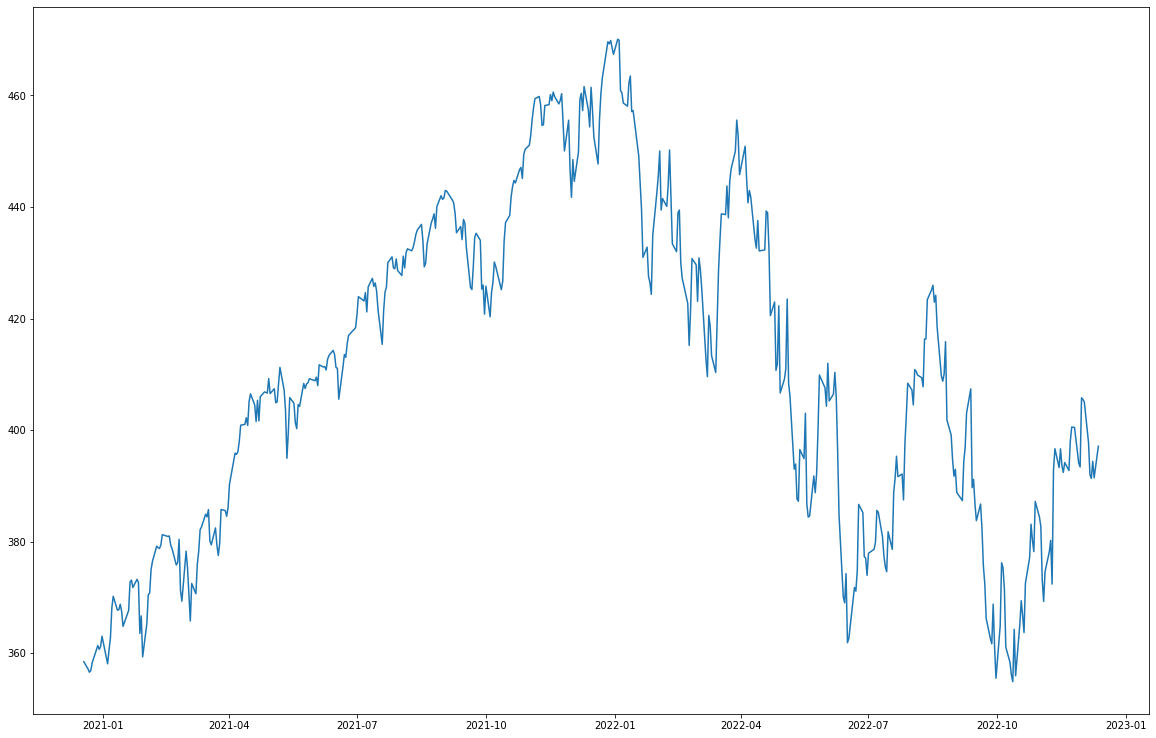

In [ ]:
plt.figure(figsize=(20,13))
plt.plot(spy_clean['close'][-500:-1])

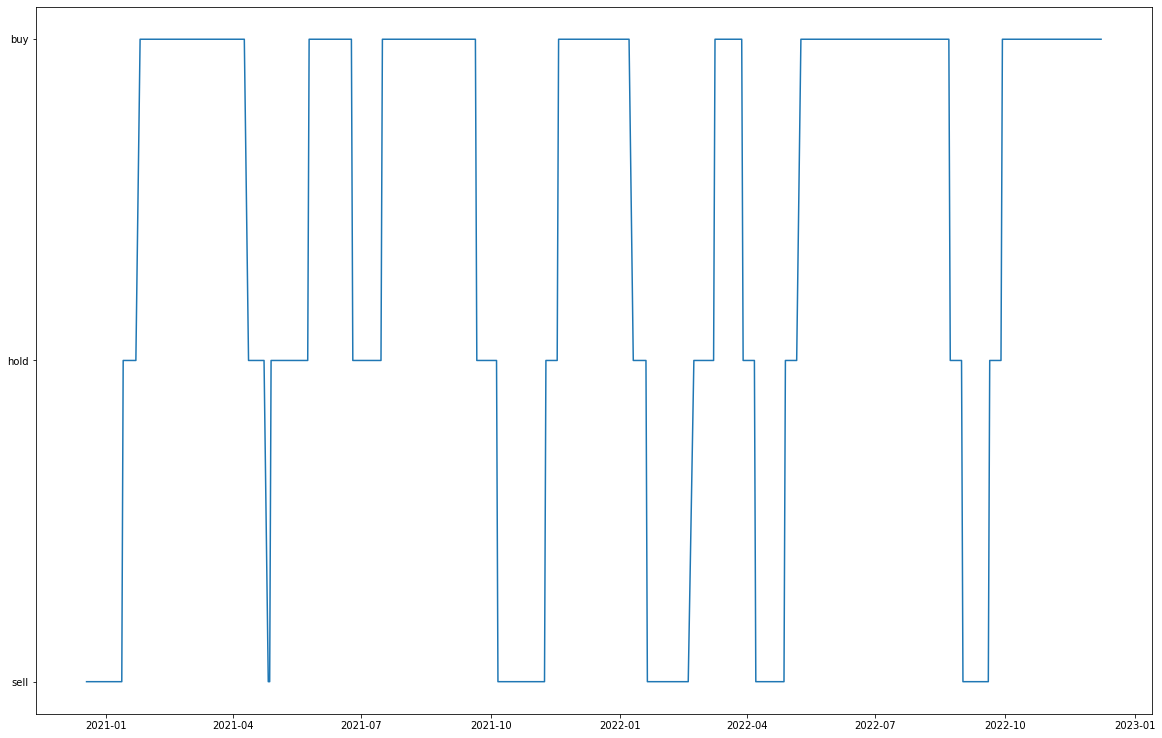

In [ ]:
plt.figure(figsize=(20,13))
plt.plot(actions_and_returns['signal'][-500:-1])

## **We can clearly see that selling at the peak of the graph could have brought us higher return, let's see if our model does that**

In [ ]:
actions_and_returns =actions_and_returns[-500:]
actions_and_returns

,Predictions,signal,close
Date,,,
2020-12-18 00:00:00-05:00,0.0,sell,358.507446
2020-12-21 00:00:00-05:00,0.0,sell,357.225647
2020-12-22 00:00:00-05:00,0.0,sell,356.623505
2020-12-23 00:00:00-05:00,0.0,sell,356.944000
2020-12-24 00:00:00-05:00,0.0,sell,358.332611
...,...,...,...
2022-12-07 00:00:00-05:00,16.0,buy,391.362854
2022-12-08 00:00:00-05:00,15.0,buy,394.428772
2022-12-09 00:00:00-05:00,15.0,buy,391.482300


## **Function to calculate return**


In [ ]:
current_position = 'out' # can be in or out
total_return = 0.0
price_of_day_entered = 0.0

for index,day in actions_and_returns.iterrows():
  if (day['signal']== 'buy' and current_position == 'out'):
    current_position = 'in'
    price_of_day_entered = day['close']
    print(f"Entered on {index}, price: {day['close']} Total return: {total_return}")
  
  if (day['signal'] == 'sell' and current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( (day['close'] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {index}, price: {day['close']}  Total return: {total_return} \n -------------------------------------")


#Close the position on the last day if it remains open
if (current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( ( actions_and_returns['close'].iloc[-2] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {actions_and_returns.iloc[-1]}, price: {actions_and_returns['close'].iloc[-1]}  Total return: {total_return}")
print(f"Total return: {total_return}")


Entered on 2021-01-25 00:00:00-05:00, price: 373.27777099609375 Total return: 0.0
Sold on 2021-04-26 00:00:00-04:00, price: 406.8656311035156  Total return: 8.998087407614037 
 -------------------------------------
Entered on 2021-05-25 00:00:00-04:00, price: 407.4794006347656 Total return: 8.998087407614037
Sold on 2021-10-06 00:00:00-04:00, price: 426.4588317871094  Total return: 13.655851977498514 
 -------------------------------------
Entered on 2021-11-18 00:00:00-05:00, price: 460.61285400390625 Total return: 13.655851977498514
Sold on 2022-01-20 00:00:00-05:00, price: 439.6179504394531  Total return: 9.09781513984764 
 -------------------------------------
Entered on 2022-03-09 00:00:00-05:00, price: 420.5867004394531 Total return: 9.09781513984764
Sold on 2022-04-07 00:00:00-04:00, price: 442.9775695800781  Total return: 14.42153772005041 
 -------------------------------------
Entered on 2022-05-09 00:00:00-04:00, price: 393.03070068359375 Total return: 14.42153772005041
Sold

## **Conclusion**
We got a **24.38%** return on our investment

The Model did a total of **12** Buy/Sell Actions (Swing trading, yet we can see in the stock graph above it was necessary to maximize the return)

The Model outpreformed the no-actions return from 2020-12-18 to 2022-12-13 , more than double that return!

**24.38 / 11.61 = ~ 2.1**

